In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras. preprocessing import sequence
from operator import itemgetter

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.utils import class_weight
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import  Conv2D, MaxPooling2D
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import glob
import numpy as np
from tqdm import tqdm
import itertools
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [285]:
data = pd.read_pickle("/content/drive/MyDrive/hr(tuples).pkl")

In [286]:
def getter(x):
    if isinstance(x,tuple):
        return itemgetter(0)(x)
    else:
        return x


In [287]:
print(data)

      Participant           Stage       0:0.0  0:0.099791  0:0.199582  \
0              22        STIMULUS   (87, 602)   (87, 602)   (87, 602)   
1              22  QUESTIONNAIRES   (85, 921)   (85, 921)   (85, 921)   
2              22         WASHOUT   (80, 749)   (80, 792)   (80, 792)   
3              22        STIMULUS   (81, 719)   (81, 719)   (81, 719)   
4              22  QUESTIONNAIRES   (83, 702)   (82, 702)   (83, 702)   
...           ...             ...         ...         ...         ...   
1339           64        STIMULUS   (78, 516)   (78, 516)   (78, 516)   
1340           64  QUESTIONNAIRES   (77, 799)   (77, 799)   (77, 816)   
1341           64         WASHOUT    (0, 987)    (0, 987)    (0, 987)   
1342           64        STIMULUS   (69, 829)   (68, 829)   (69, 829)   
1343           64  QUESTIONNAIRES  (66, 1245)  (65, 1245)  (65, 1245)   

     0:0.299373  0:0.399164 0:0.49895500000000004  0:0.598746  \
0     (87, 602)   (87, 602)             (87, 602)   (87, 6

In [288]:
data['Participant'].value_counts()


22    32
54    32
46    32
47    32
48    32
49    32
50    32
51    32
52    32
53    32
55    32
23    32
56    32
57    32
58    32
59    32
60    32
61    32
62    32
63    32
45    32
44    32
43    32
42    32
24    32
25    32
26    32
27    32
28    32
29    32
31    32
32    32
33    32
34    32
35    32
36    32
37    32
38    32
39    32
40    32
41    32
64    32
Name: Participant, dtype: int64

In [289]:
data['Target'].value_counts()

NEUTRAL       126
AWE           126
DISGUST       126
SURPRISE      126
ANGER         126
ENTHUSIASM    126
LIKING        126
FEAR          126
AMUSEMENT     126
SADNESS       126
BASELINE       84
Name: Target, dtype: int64

In [290]:
df = data.iloc[: , 1:-12]

In [291]:
df

,Stage,0:0.0,0:0.099791,0:0.199582,0:0.299373,0:0.399164,0:0.49895500000000004,0:0.598746,0:0.6985370000000001,0:0.798328,...,10:26.787271000000032,10:26.887062000000014,10:26.986852999999996,10:27.08664399999998,10:27.186435000000074,10:27.286226000000056,10:27.386017000000038,10:27.48580800000002,10:27.585599000000002,Target
0,STIMULUS,"(87, 602)","(87, 602)","(87, 602)","(87, 602)","(87, 602)","(87, 602)","(87, 602)","(87, 406)","(87, 406)",...,None,None,None,None,None,None,None,None,None,BASELINE
1,QUESTIONNAIRES,"(85, 921)","(85, 921)","(85, 921)","(85, 921)","(85, 921)","(85, 921)","(85, 921)","(85, 921)","(85, 478)",...,None,None,None,None,None,None,None,None,None,BASELINE
2,WASHOUT,"(80, 749)","(80, 792)","(80, 792)","(80, 792)","(80, 792)","(80, 792)","(79, 792)","(79, 792)","(79, 801)",...,None,None,None,None,None,None,None,None,None,NEUTRAL
3,STIMULUS,"(81, 719)","(81, 719)","(81, 719)","(81, 719)","(81, 734)","(81, 734)","(81, 734)","(81, 734)","(81, 734)",...,None,None,None,None,None,None,None,None,None,NEUTRAL
4,QUESTIONNAIRES,"(83, 702)","(82, 702)","(83, 702)","(83, 702)","(83, 702)","(82, 702)","(82, 702)","(82, 702)","(82, 702)",...,None,None,None,None,None,None,None,None,None,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,STIMULUS,"(78, 516)","(78, 516)","(78, 516)","(78, 634)","(78, 634)","(78, 634)","(78, 634)","(78, 634)","(78, 634)",...,None,None,None,None,None,None,None,None,None,NEUTRAL
1340,QUESTIONNAIRES,"(77, 799)","(77, 799)","(77, 816)","(77, 816)","(77, 816)","(77, 816)","(77, 816)","(77, 816)","(77, 816)",...,None,None,None,None,None,None,None,None,None,NEUTRAL
1341,WASHOUT,"(0, 987)","(0, 987)","(0, 987)","(0, 987)","(-10, 987)","(-10, 987)","(-10, 987)","(-10, 987)","(-10, 987)",...,None,None,None,None,None,None,None,None,None,AWE
1342,STIMULUS,"(69, 829)","(68, 829)","(69, 829)","(69, 829)","(69, 829)","(69, 1248)","(68, 1248)","(68, 1248)","(68, 1248)",...,None,None,None,None,None,None,None,None,None,AWE


In [292]:
#mask = data["Stage"] == "STIMULUS"
hr_df = df.loc[: , :].applymap(lambda x:getter(x))

In [293]:
hr_df

,Stage,0:0.0,0:0.099791,0:0.199582,0:0.299373,0:0.399164,0:0.49895500000000004,0:0.598746,0:0.6985370000000001,0:0.798328,...,10:26.787271000000032,10:26.887062000000014,10:26.986852999999996,10:27.08664399999998,10:27.186435000000074,10:27.286226000000056,10:27.386017000000038,10:27.48580800000002,10:27.585599000000002,Target
0,STIMULUS,87,87,87,87,87,87,87,87,87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BASELINE
1,QUESTIONNAIRES,85,85,85,85,85,85,85,85,85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BASELINE
2,WASHOUT,80,80,80,80,80,80,79,79,79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEUTRAL
3,STIMULUS,81,81,81,81,81,81,81,81,81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEUTRAL
4,QUESTIONNAIRES,83,82,83,83,83,82,82,82,82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,STIMULUS,78,78,78,78,78,78,78,78,78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEUTRAL
1340,QUESTIONNAIRES,77,77,77,77,77,77,77,77,77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEUTRAL
1341,WASHOUT,0,0,0,0,-10,-10,-10,-10,-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AWE
1342,STIMULUS,69,68,69,69,69,69,68,68,68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AWE


In [294]:
hr_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Columns: 6292 entries, Stage to Target
dtypes: float64(6160), int64(130), object(2)
memory usage: 64.5+ MB


In [295]:
hr_df=hr_df.fillna(0)

In [296]:
hr_df['Target'].value_counts()

NEUTRAL       126
AWE           126
DISGUST       126
SURPRISE      126
ANGER         126
ENTHUSIASM    126
LIKING        126
FEAR          126
AMUSEMENT     126
SADNESS       126
BASELINE       84
Name: Target, dtype: int64

In [297]:
hr_df['Target'] = df['Target'].replace(['BASELINE','NEUTRAL','AWE','DISGUST','SURPRISE','ANGER','ENTHUSIASM','LIKING','FEAR','AMUSEMENT','SADNESS'], [0,0,1,2,3,4,5,6,7,8,9])

In [298]:
hr_df

,Stage,0:0.0,0:0.099791,0:0.199582,0:0.299373,0:0.399164,0:0.49895500000000004,0:0.598746,0:0.6985370000000001,0:0.798328,...,10:26.787271000000032,10:26.887062000000014,10:26.986852999999996,10:27.08664399999998,10:27.186435000000074,10:27.286226000000056,10:27.386017000000038,10:27.48580800000002,10:27.585599000000002,Target
0,STIMULUS,87,87,87,87,87,87,87,87,87,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,QUESTIONNAIRES,85,85,85,85,85,85,85,85,85,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,WASHOUT,80,80,80,80,80,80,79,79,79,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,STIMULUS,81,81,81,81,81,81,81,81,81,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,QUESTIONNAIRES,83,82,83,83,83,82,82,82,82,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,STIMULUS,78,78,78,78,78,78,78,78,78,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1340,QUESTIONNAIRES,77,77,77,77,77,77,77,77,77,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1341,WASHOUT,0,0,0,0,-10,-10,-10,-10,-10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1342,STIMULUS,69,68,69,69,69,69,68,68,68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [299]:
hr_df.dtypes

Stage                     object
0:0.0                      int64
0:0.099791                 int64
0:0.199582                 int64
0:0.299373                 int64
                          ...   
10:27.286226000000056    float64
10:27.386017000000038    float64
10:27.48580800000002     float64
10:27.585599000000002    float64
Target                     int64
Length: 6292, dtype: object

In [300]:
hr_df.iloc[: , 1:-1]=hr_df.iloc[: , 1:-1].astype(float)

In [301]:
hr_df=hr_df.iloc[: , 1:]

In [302]:
hr_df.head()

,0:0.0,0:0.099791,0:0.199582,0:0.299373,0:0.399164,0:0.49895500000000004,0:0.598746,0:0.6985370000000001,0:0.798328,0:0.898119,...,10:26.787271000000032,10:26.887062000000014,10:26.986852999999996,10:27.08664399999998,10:27.186435000000074,10:27.286226000000056,10:27.386017000000038,10:27.48580800000002,10:27.585599000000002,Target
0,87.0,87.0,87.0,87.0,87.0,87.0,87.0,87.0,87.0,88.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,80.0,80.0,80.0,80.0,80.0,80.0,79.0,79.0,79.0,79.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,81.0,81.0,81.0,81.0,81.0,81.0,81.0,81.0,81.0,81.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,83.0,82.0,83.0,83.0,83.0,82.0,82.0,82.0,82.0,82.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [310]:
hr_df['Target'].value_counts()

0    210
1    126
2    126
3    126
4    126
5    126
6    126
7    126
8    126
9    126
Name: Target, dtype: int64

In [303]:
train_data, test_data,train_labels,test_labels=train_test_split(hr_df.values,hr_df.values[:,-1],test_size=0.2,random_state=123)

In [304]:
len(train_data)

1075

In [305]:
len(train_labels)

1075

In [306]:
len(test_data)

269

In [307]:
len(test_labels)

269

In [308]:
normal_train=pd.DataFrame(train_data)
anomly_train=pd.DataFrame(train_data)
normal_test=pd.DataFrame(test_data)
anomly_test=pd.DataFrame(test_data)

In [309]:
normal_train

,0,1,2,3,4,5,6,7,8,9,...,6281,6282,6283,6284,6285,6286,6287,6288,6289,6290
0,94.0,94.0,94.0,94.0,94.0,94.0,94.0,94.0,95.0,95.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,108.0,108.0,108.0,108.0,108.0,108.0,108.0,108.0,108.0,108.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,78.0,78.0,78.0,78.0,78.0,78.0,78.0,78.0,79.0,79.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,79.0,79.0,79.0,79.0,79.0,79.0,79.0,79.0,79.0,79.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,87.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,84.0,84.0,84.0,84.0,84.0,84.0,84.0,84.0,84.0,84.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1071,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1072,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1073,85.0,85.0,85.0,85.0,85.0,85.0,84.0,85.0,85.0,85.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0


In [311]:
normal_train=normal_train[normal_train.iloc[:,6290]==0].values[:,:-1]

In [312]:
anomly_train=anomly_train[anomly_train.iloc[:,6290]>0].values[:,:-1]

In [313]:
normal_test=normal_test[normal_test.iloc[:,6290]==0].values[:,:-1]

In [314]:
anomly_test=anomly_test[anomly_test.iloc[:,6290]>0].values[:,:-1]

In [315]:
print(normal_train.shape)
print(normal_test.shape)

(165, 6290)
(45, 6290)


In [316]:
print(anomly_train.shape)
print(anomly_test.shape)

(910, 6290)
(224, 6290)


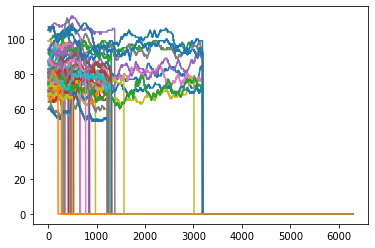

In [317]:
for i in range(62):
  plt.plot(normal_train[i])

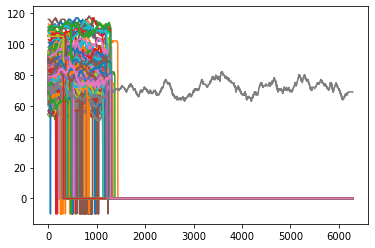

In [318]:
for i in range(307):
  plt.plot(anomly_train[i])

In [320]:
model=tf.keras.Sequential()
model .add(tf.keras.layers.Dense(64, activation='relu'))
model .add(tf.keras.layers.Dense(32, activation='relu'))
model. add(tf.keras. layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras. layers.Dense(32, activation='relu'))
model. add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(6290, activation='sigmoid'))

In [322]:
from pandas._libs.hashtable import mode
earl_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss'
,patience=2,mode='min')
model.compile(optimizer='adam', loss='mae')

In [334]:
history=model.fit(normal_train,normal_train,
                  epochs=200,
                  batch_size=500,
                  validation_data=(train_data[:,:-1],train_data[:,:-1]),
                  shuffle=True
                  ,callbacks=[earl_stopping])

Epoch 1/200
1/1 [==============================] - 0s 208ms/step - loss: 17.0978 - val_loss: 12.5009
Epoch 2/200
1/1 [==============================] - 0s 134ms/step - loss: 17.0976 - val_loss: 12.5007
Epoch 3/200
1/1 [==============================] - 0s 134ms/step - loss: 17.0974 - val_loss: 12.5006
Epoch 4/200
1/1 [==============================] - 0s 142ms/step - loss: 17.0973 - val_loss: 12.5006
Epoch 5/200
1/1 [==============================] - 0s 152ms/step - loss: 17.0972 - val_loss: 12.5005
Epoch 6/200
1/1 [==============================] - 0s 132ms/step - loss: 17.0972 - val_loss: 12.5004
Epoch 7/200
1/1 [==============================] - 0s 137ms/step - loss: 17.0971 - val_loss: 12.5003
Epoch 8/200
1/1 [==============================] - 0s 133ms/step - loss: 17.0969 - val_loss: 12.5002
Epoch 9/200
1/1 [==============================] - 0s 135ms/step - loss: 17.0969 - val_loss: 12.5002
Epoch 10/200
1/1 [==============================] - 0s 138ms/step - loss: 17.0968 - val_los

2/2 [==============================] - 0s 7ms/step


(array([2., 4., 1., 2., 3., 1., 1., 0., 0., 0., 0., 0., 4., 2., 5., 0., 5.,
        5., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 2., 0., 0., 2.]),
 array([ 2.28235092,  3.15016772,  4.01798452,  4.88580132,  5.75361812,
         6.62143492,  7.48925172,  8.35706852,  9.22488532, 10.09270212,
        10.96051892, 11.82833572, 12.69615252, 13.56396932, 14.43178612,
        15.29960292, 16.16741972, 17.03523652, 17.90305332, 18.77087012,
        19.63868692, 20.50650372, 21.37432052, 22.24213732, 23.10995413,
        23.97777093, 24.84558773, 25.71340453, 26.58122133, 27.44903813,
        28.31685493, 29.18467173, 30.05248853, 30.92030533, 31.78812213,
        32.65593893, 33.52375573, 34.39157253, 35.25938933, 36.12720613,
        36.99502293, 37.86283973, 38.73065653, 39.59847333, 40.46629013,
        41.33410693, 42.20192373, 43.06974053, 43.93755733, 44.80537413,
        45.67319093]),
 <a list of 50 Patch 

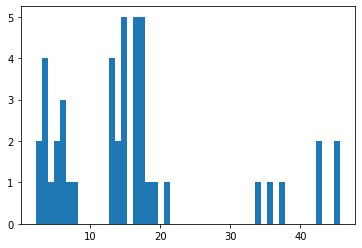

In [335]:
rec=model.predict(normal_test)
train_loss=tf.keras.losses.mae(rec,normal_test)
plt.hist(train_loss,bins=50)

In [336]:
np.mean(train_loss)

16.312124343704873

In [337]:
np.std(train_loss)

11.766075704106793

In [338]:
th_normal=np.mean(train_loss)+2*np.std(train_loss)

In [339]:
th_normal

39.84427575191846

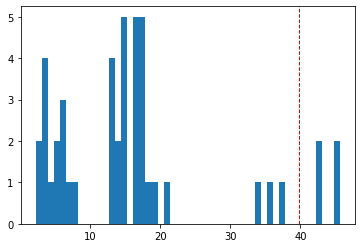

In [340]:
plt.hist(train_loss,bins=50)
plt.axvline(th_normal, color='r', linestyle='dashed', linewidth=1)

7/7 [==============================] - 0s 11ms/step


(array([ 6.,  1.,  7.,  9., 11.,  7.,  8.,  6.,  7.,  4.,  4.,  6.,  7.,
         4.,  3.,  4.,  1.,  1.,  2.,  1.,  0.,  0.,  0.,  2.,  2.,  2.,
         2.,  3.,  4., 10.,  8.,  5., 12.,  7., 22.,  8., 13.,  5.,  4.,
         4.,  3.,  1.,  2.,  0.,  0.,  1.,  2.,  0.,  1.,  2.]),
 array([ 1.92804892,  2.32797005,  2.72789117,  3.1278123 ,  3.52773342,
         3.92765455,  4.32757568,  4.7274968 ,  5.12741793,  5.52733905,
         5.92726018,  6.3271813 ,  6.72710243,  7.12702355,  7.52694468,
         7.92686581,  8.32678693,  8.72670806,  9.12662918,  9.52655031,
         9.92647143, 10.32639256, 10.72631368, 11.12623481, 11.52615594,
        11.92607706, 12.32599819, 12.72591931, 13.12584044, 13.52576156,
        13.92568269, 14.32560381, 14.72552494, 15.12544606, 15.52536719,
        15.92528832, 16.32520944, 16.72513057, 17.12505169, 17.52497282,
        17.92489394, 18.32481507, 18.72473619, 19.12465732, 19.52457845,
        19.92449957, 20.3244207 , 20.72434182, 21.12426295,

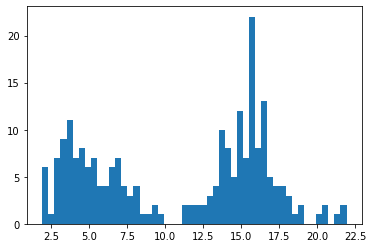

In [341]:
rec_a=model.predict(anomly_test)
train_loss_a=tf.keras.losses.mae(rec_a,anomly_test)
plt.hist(train_loss_a,bins=50)


In [343]:
np.mean(train_loss_a)

10.947757281719788

In [344]:
np.std(train_loss_a)

5.564393571647664

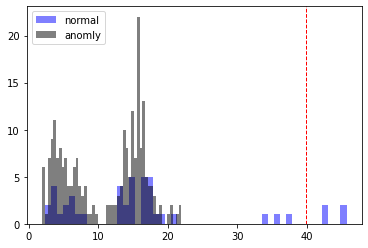

In [351]:
plt.hist(train_loss,bins=50,label='normal',color='b',alpha=0.5)
plt.hist(train_loss_a,bins=50,label='anomly',color='k',alpha=0.5)
plt.axvline(th_normal, color='r', linestyle='dashed', linewidth=1)
plt.legend()
plt.show()